In [452]:
!pip install -r requirements.txt --quiet


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [109]:
import os
import multiprocessing

try:
    multiprocessing.set_start_method('forkserver', force=True)
except (RuntimeError, ValueError):
    try:
        multiprocessing.set_start_method('spawn', force=True)
    except RuntimeError:
        pass

%matplotlib inline
import pymc as pm
import numpy as np
import pandas as pd
import seaborn as sns
import arviz as az
from scipy import stats
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf, linewidth=np.inf, suppress=False)

%config InlineBackend.figure_format = 'retina'
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])

In [79]:
pos = np.random.choice([-1, 1], size=(1000,16)).sum(axis=1)

In [80]:
(1 + np.random.uniform(0,.1, size = 12)).prod()

1.8547416546476452

#### Code 4.3

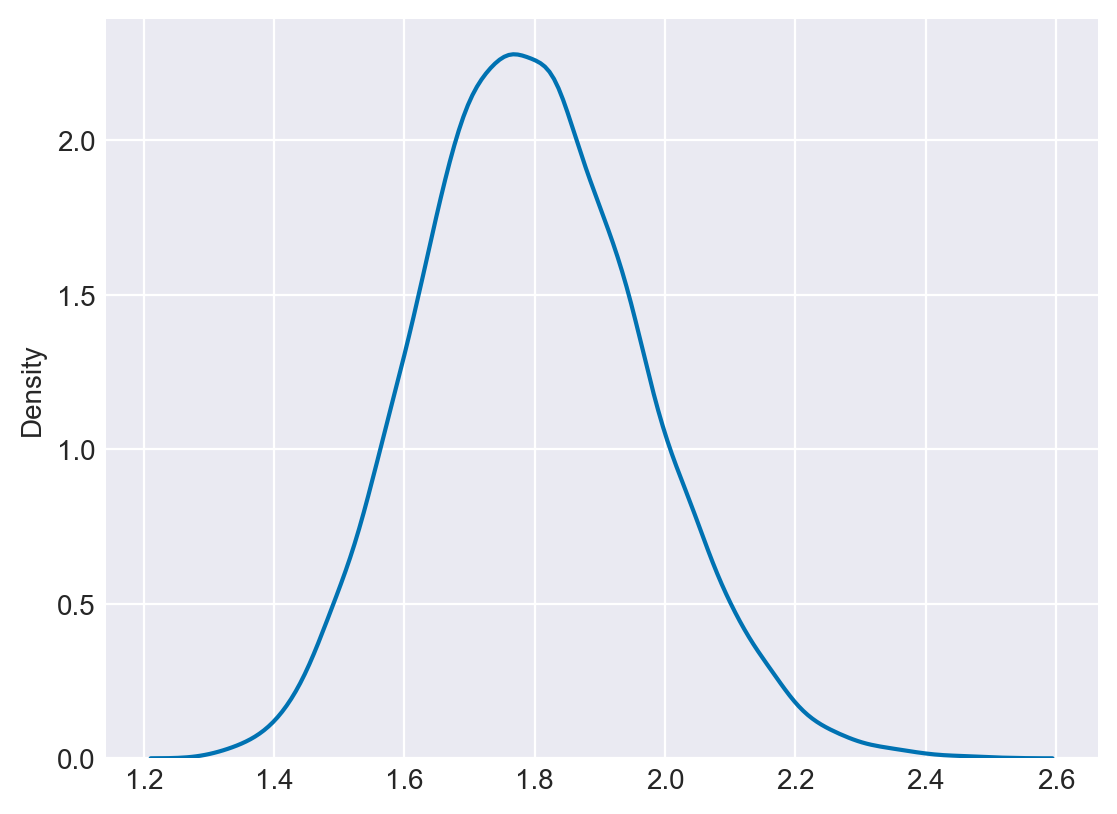

In [81]:
growth = np.array([(1 + np.random.uniform(0,.1, size = 12)).prod() for i in range(10000)])
sns.kdeplot(growth);

#### Code 4.4

In [82]:
big = np.array([(1 + np.random.uniform(0,.5, size = 12)).prod() for i in range(10000)])
small = np.array([(1 + np.random.uniform(0,.01, size = 12)).prod() for i in range(10000)])

#### Code 4.5

In [83]:
log_big = np.array([np.log(1 + np.random.uniform(0, .5, size=12)).sum() for i in range(10000)])

#### Code 4.6

In [84]:
w, n = 60, 90
p_grid = np.linspace(0, 1, 100) 
posterior = stats.binom.pmf(w,n,p_grid) * stats.uniform.pdf(p_grid, 0, 1) 
posterior = posterior / (posterior).sum() 

#### Code 4.7

In [85]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)

#### Code 4.8

In [86]:
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


#### Code 4.9

In [87]:
d.describe()

,height,weight,age,male
count,544.000000,544.000000,544.000000,544.000000
mean,138.263596,35.610618,29.344393,0.472426
std,27.602448,14.719178,20.746888,0.499699
min,53.975000,4.252425,0.000000,0.000000
25%,125.095000,22.007717,12.000000,0.000000
50%,148.590000,40.057844,27.000000,0.000000
75%,157.480000,47.209005,43.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


#### Code 4.10

In [88]:
d.height

0      151.765
1      139.700
2      136.525
3      156.845
4      145.415
        ...   
539    145.415
540    162.560
541    156.210
542     71.120
543    158.750
Name: height, Length: 544, dtype: float64

#### Code 4.11

In [89]:
d2 = d[d.age >= 18]

#### Code 4.12

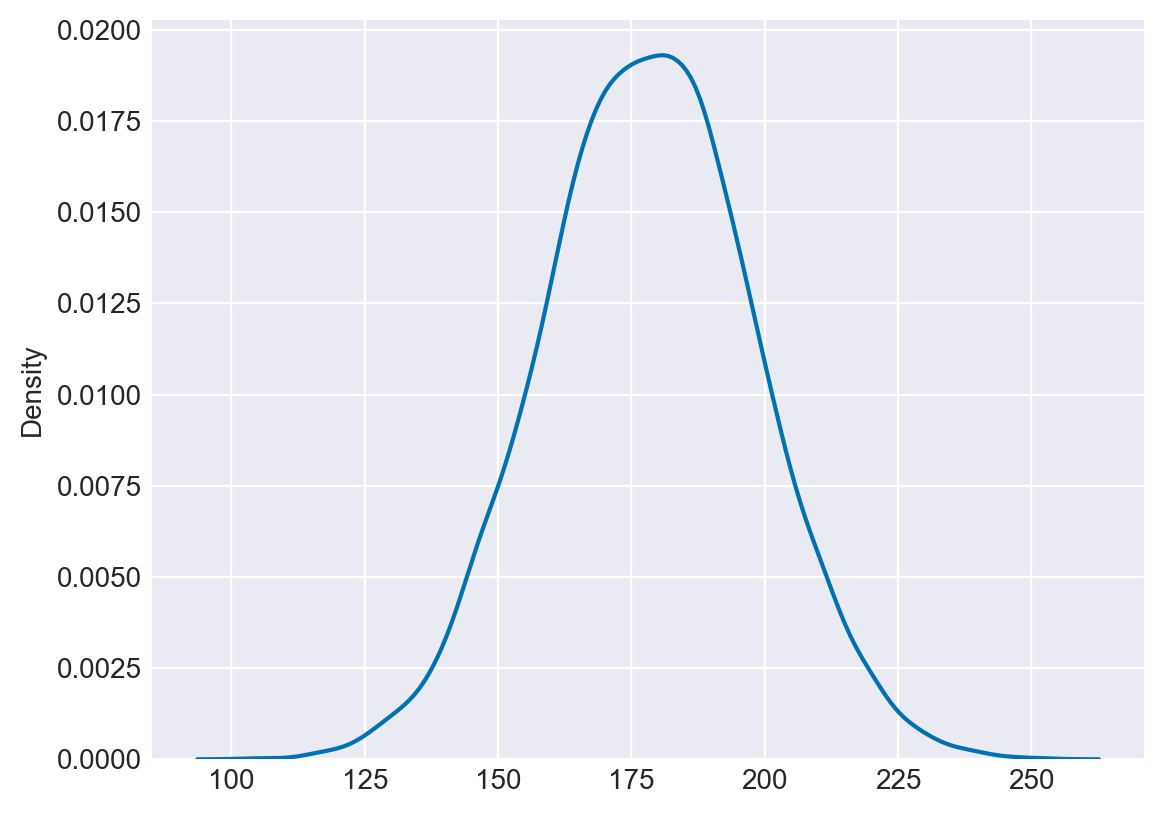

In [90]:
sns.kdeplot(np.random.normal(178, 20, size=10000));

#### Code 4.13

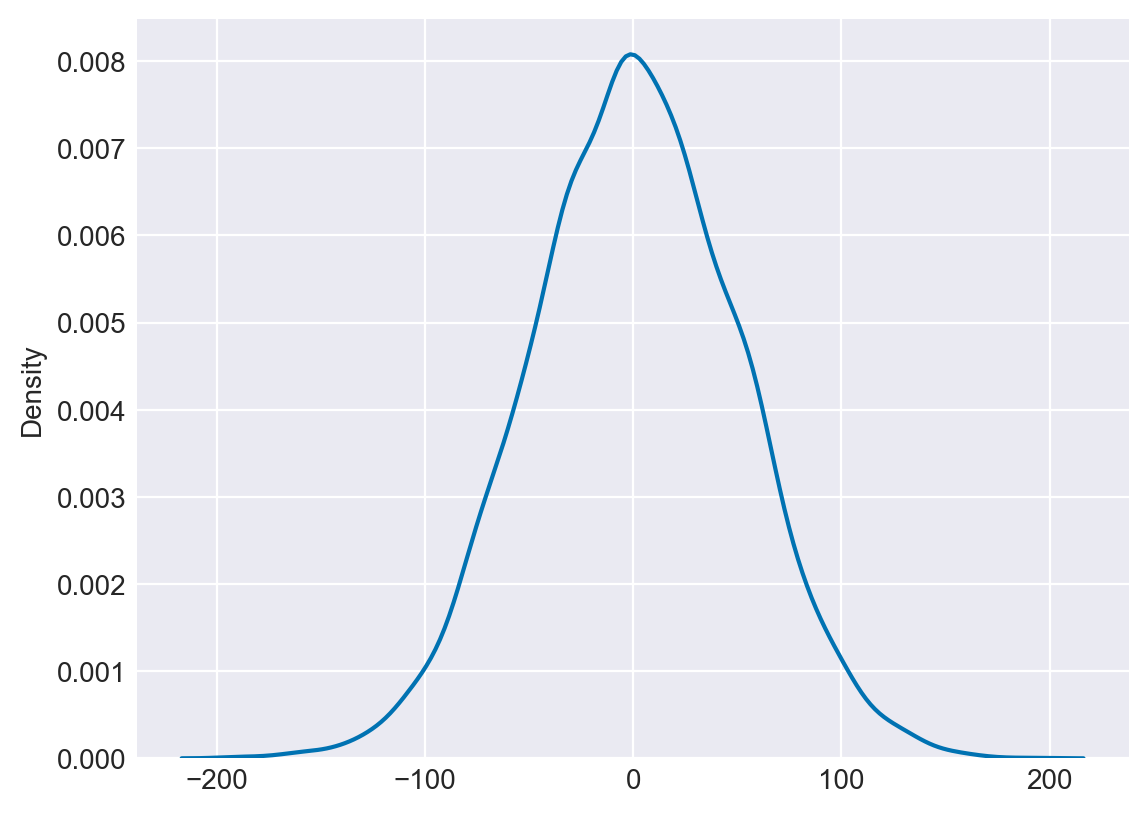

In [91]:
sns.kdeplot(np.random.normal(0, 50, size=10000));

#### Code 4.14

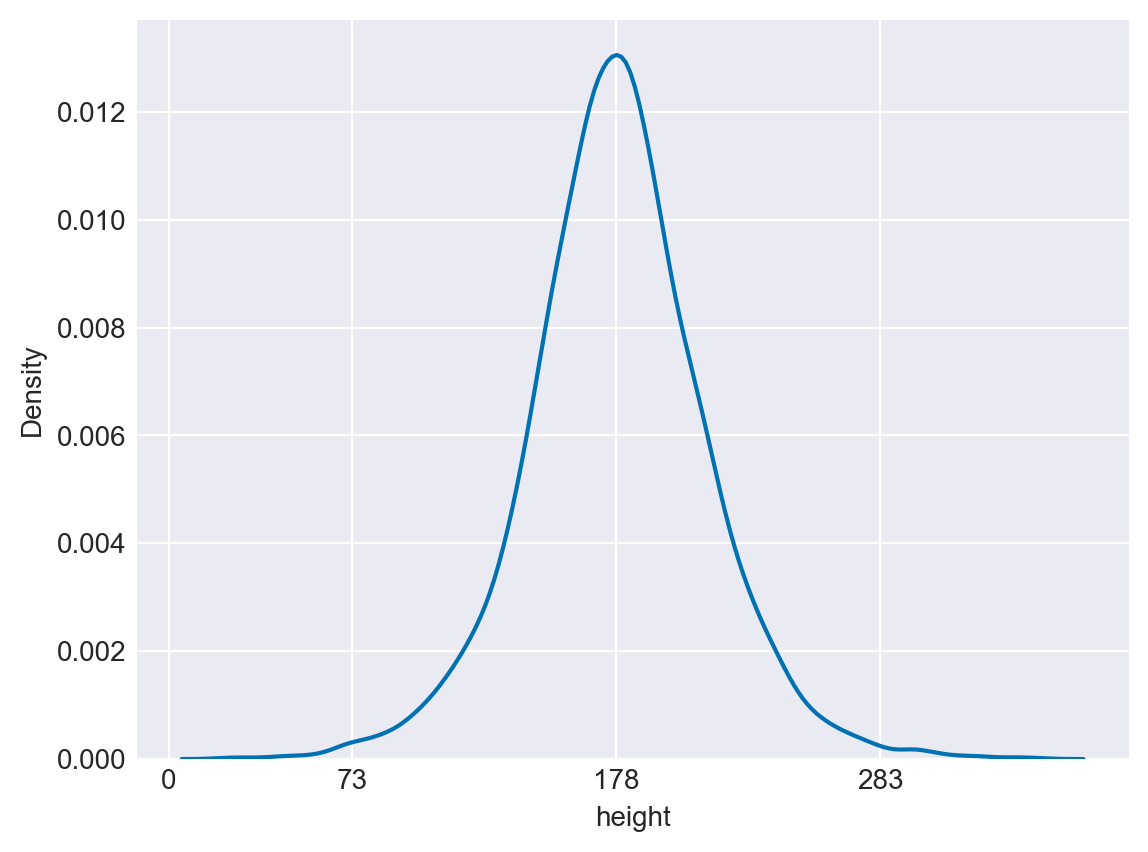

In [92]:
sample_mu = np.random.normal(178, 20, size=10000) 
sample_sigma = np.random.uniform(0,50, size=10000)
prior_h = np.random.normal(sample_mu, sample_sigma, size=10000)
ax = sns.kdeplot(prior_h)
ax.set_xlabel('height')
ax.set_ylabel('Density')
ax.set_xticks([0, 73, 178, 283]);


#### Code 4.15

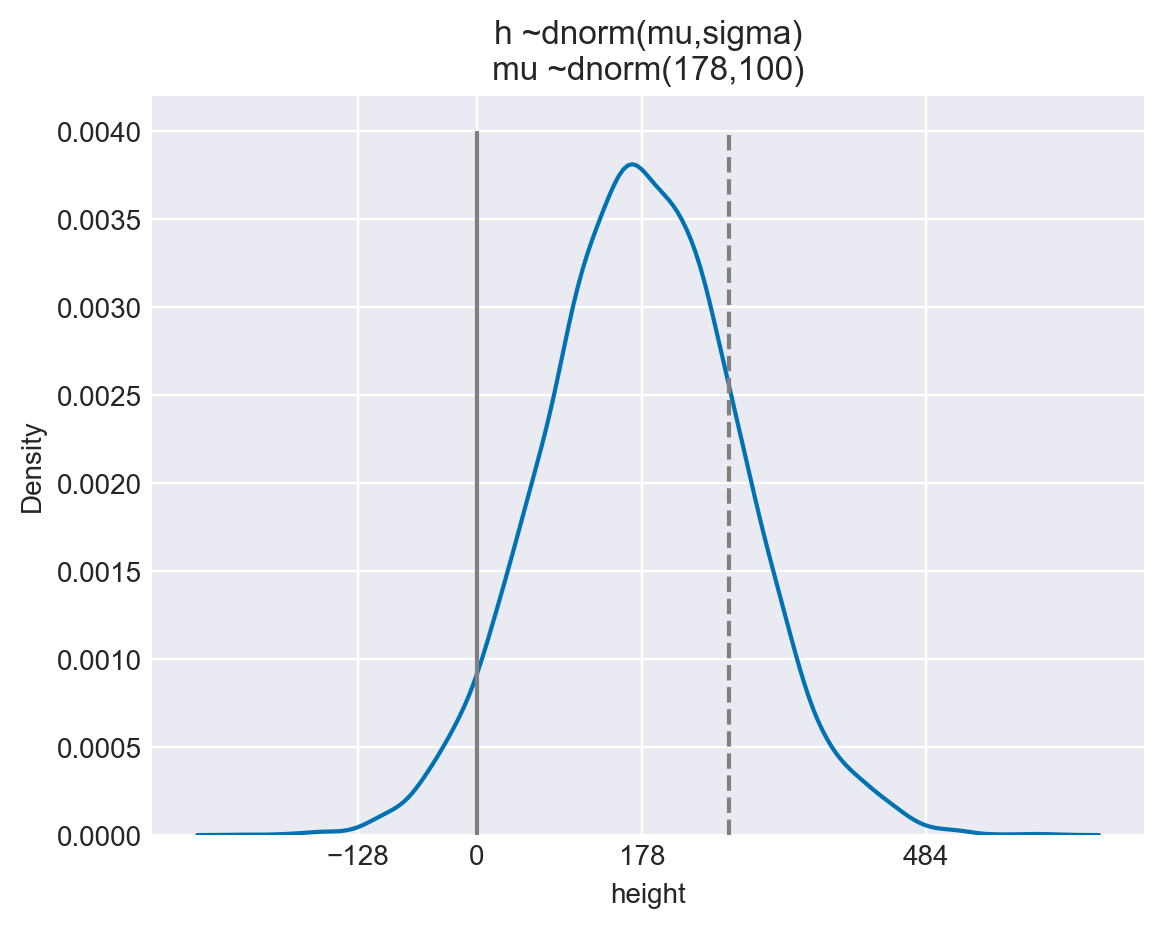

In [93]:
sample_mu = np.random.normal(178, 100, size=10000) 
sample_sigma = np.random.uniform(0,50, size=10000)
prior_h = np.random.normal(sample_mu, sample_sigma, size=10000)
ax = sns.kdeplot(prior_h)
ax.vlines(272, ymin = 0, ymax = 0.004, color='grey', linestyle='--')
ax.vlines(0, ymin = 0, ymax = 0.004, color='grey', linestyle='-')
ax.set_xlabel('height')
ax.set_ylabel('Density')
ax.set_xticks([-128, 0, 178, 484])
ax.set_title('h ~dnorm(mu,sigma)\nmu ~dnorm(178,100)');


#### Code 4.16

In [94]:
mu_list = np.linspace(150, 160, 100) 
sigma_list = np.linspace(7, 9, 100)

mu_grid, sigma_grid = np.meshgrid(mu_list, sigma_list)

mu = mu_grid.flatten()
sigma = sigma_grid.flatten() 

post_ll = np.array([
    np.sum(stats.norm.logpdf(d2['height'], mu, sigma))
    for mu, sigma in zip(mu, sigma)
])

post_prod = (post_ll + 
             stats.norm.logpdf(mu, loc=178, scale=20) + 
             stats.uniform.logpdf(sigma, loc=0, scale=50))

post_prob = np.exp(post_prod - max(post_prod)).reshape(mu_grid.shape)



#### Code 4.17

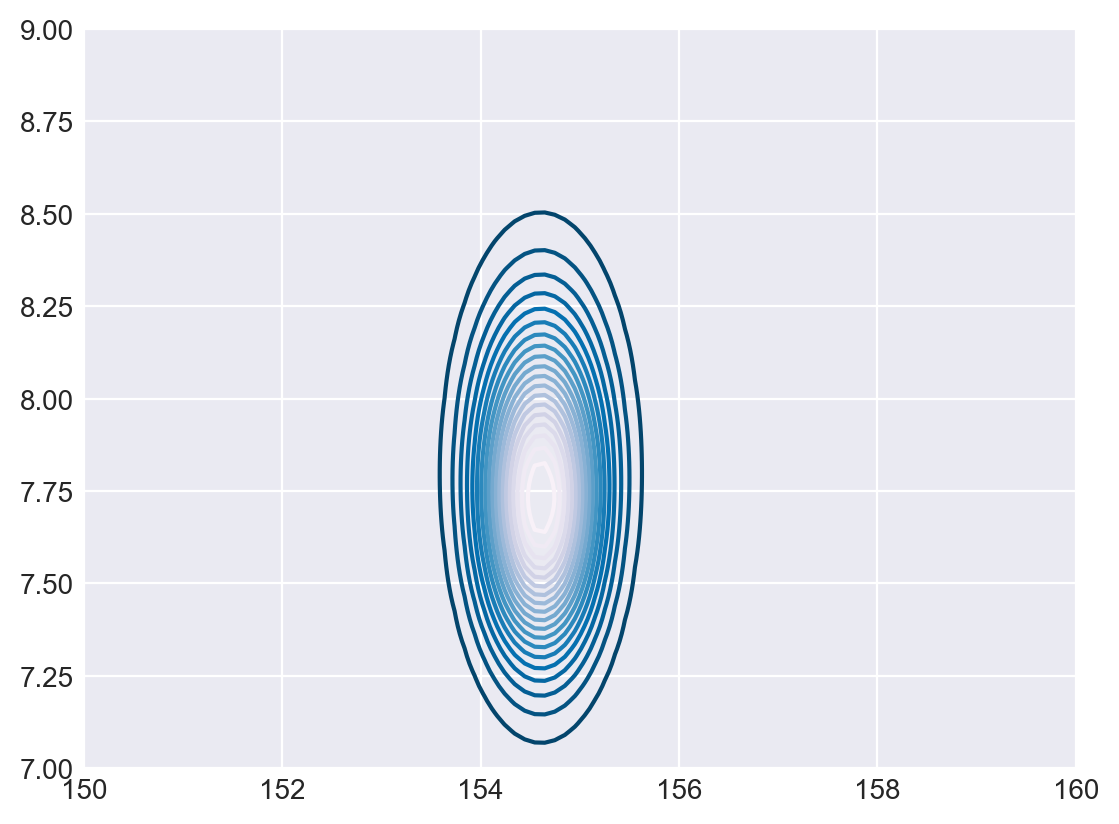

In [95]:
plt.contour(mu_grid, sigma_grid, post_prob, levels=20, cmap = 'PuBu_r');

#### Code 4.18

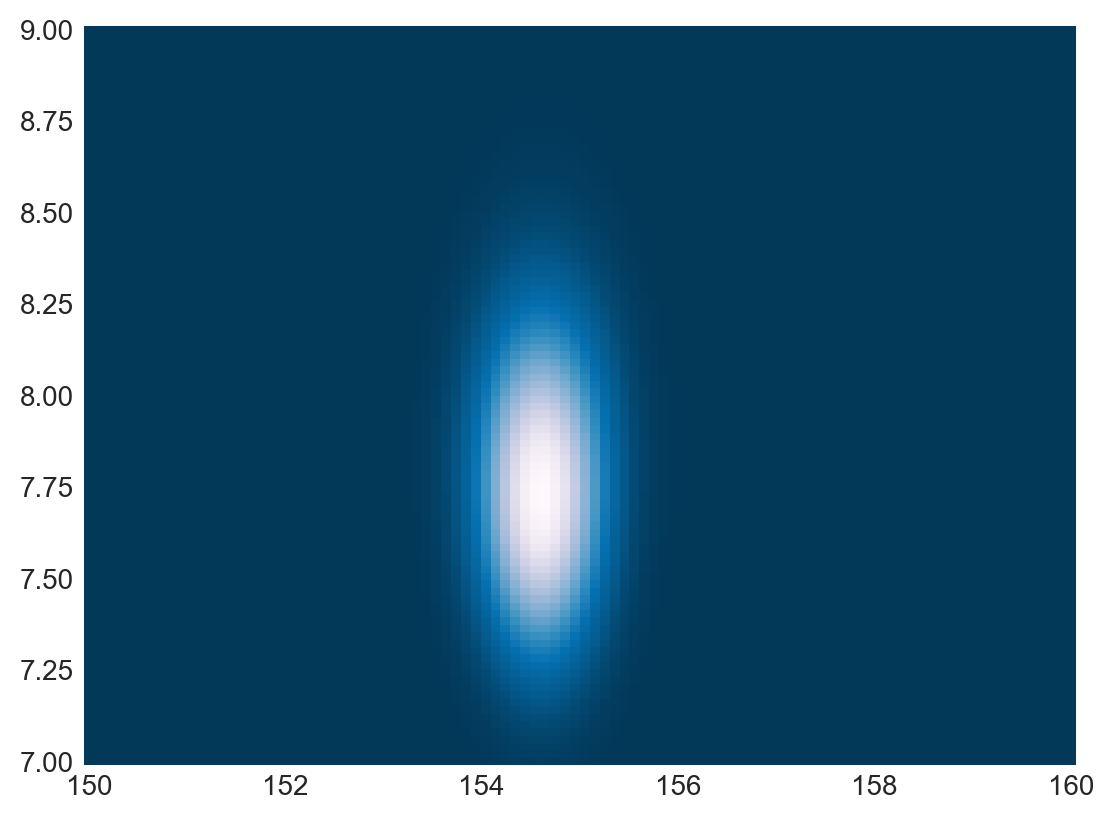

In [96]:
plt.pcolormesh(mu_grid, sigma_grid, post_prob, cmap='PuBu_r');

#### Code 4.19

In [97]:
sample_rows = np.random.choice(np.arange(len(mu)), size = int(1e4), replace = True, p = post_prob.flatten() / post_prob.flatten().sum())
sample_mu = mu[sample_rows]
sample_sigma = sigma[sample_rows]

#### Code 4.21

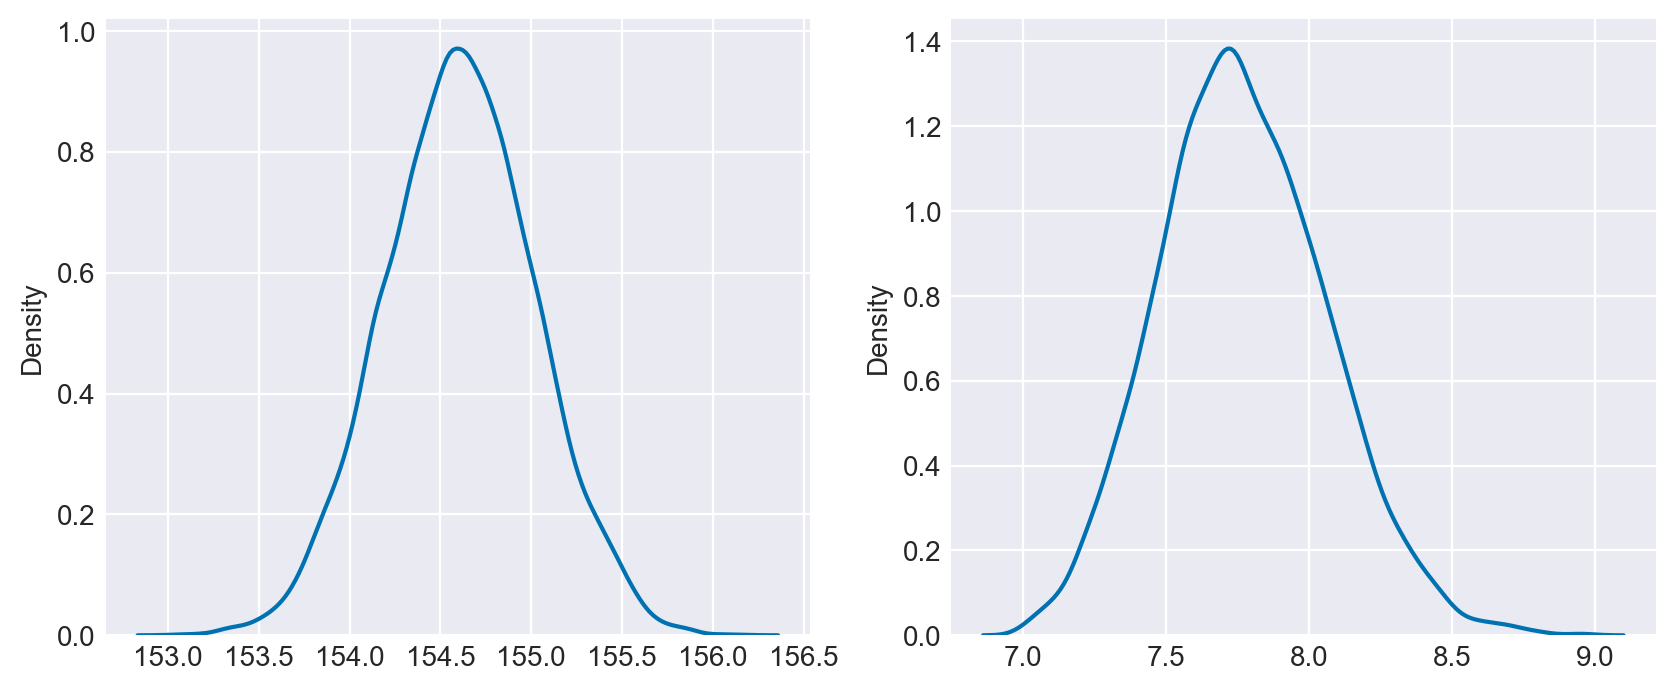

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.kdeplot(sample_mu, ax=ax[0]);
sns.kdeplot(sample_sigma, ax=ax[1]);


#### Code 4.22

In [99]:
display(np.percentile(sample_mu, [25, 75]))
np.percentile(sample_sigma, [25, 75])

array([154.34343434, 154.84848485])

array([7.56565657, 7.96969697])

#### Code 4.23

In [100]:
d3 = d2.sample(20, random_state=42)

#### Code 4.24

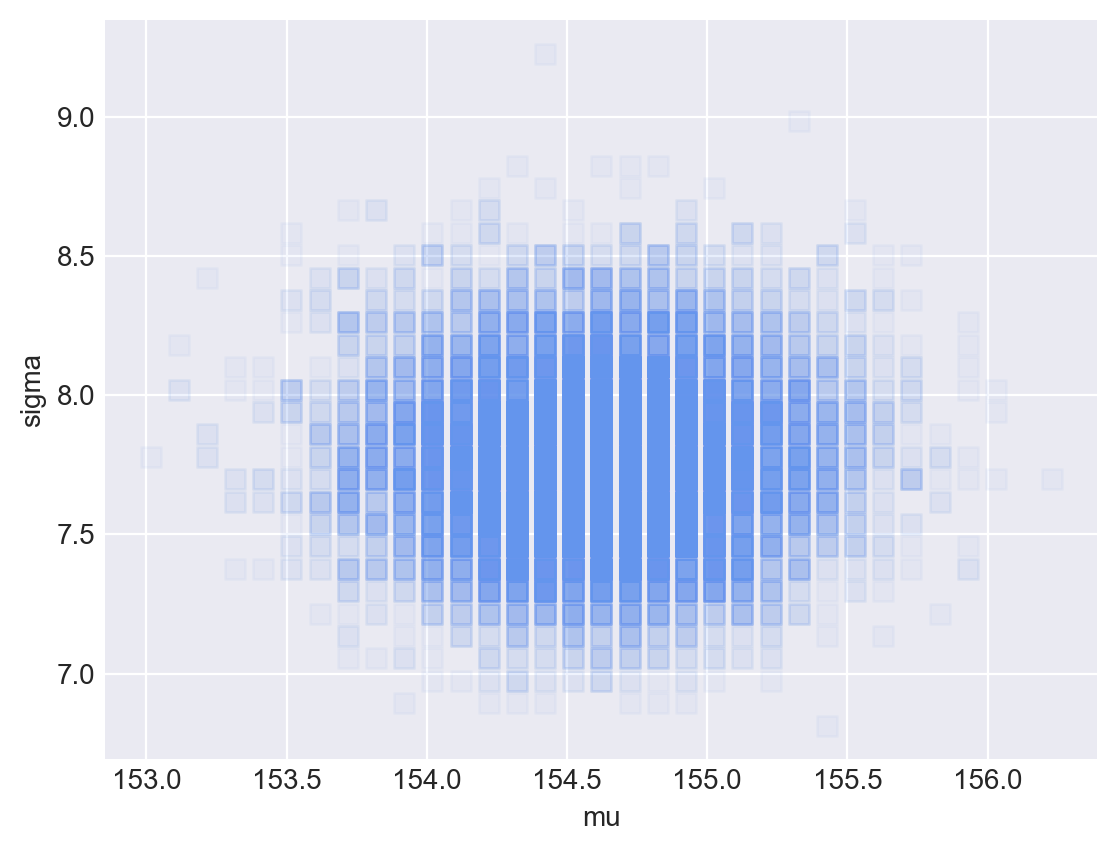

In [101]:
mu_list = np.linspace(150, 170, 200) 
sigma_list = np.linspace(4, 20, 200)

mu_grid, sigma_grid = np.meshgrid(mu_list, sigma_list)
mu_2 = mu_grid.flatten()
sigma_2 = sigma_grid.flatten()

post2_ll = [sum(stats.norm.logpdf(d2.height, loc=mu_2[i] , scale=sigma_2[i])) for i in range(len(mu_2))]

post2_prob = (post2_ll + 
             stats.norm.logpdf(mu_2, loc=178, scale=20) + 
             stats.uniform.logpdf(sigma_2, loc=0, scale=50))

post2_prob = np.exp(post2_prob - max(post2_prob)).reshape(mu_grid.shape)
post2_samples = np.random.choice(np.arange(len(mu_2)), size = int(1e4), replace = True, p = post2_prob.flatten() / post2_prob.flatten().sum())
sample_mu_2 = mu_2[post2_samples]
sample_sigma_2 = sigma_2[post2_samples]

plt.scatter(sample_mu_2, sample_sigma_2, marker='s', s = 50, alpha=0.05, color='cornflowerblue')
plt.xlabel('mu')
plt.ylabel('sigma');

#### Code 4.25

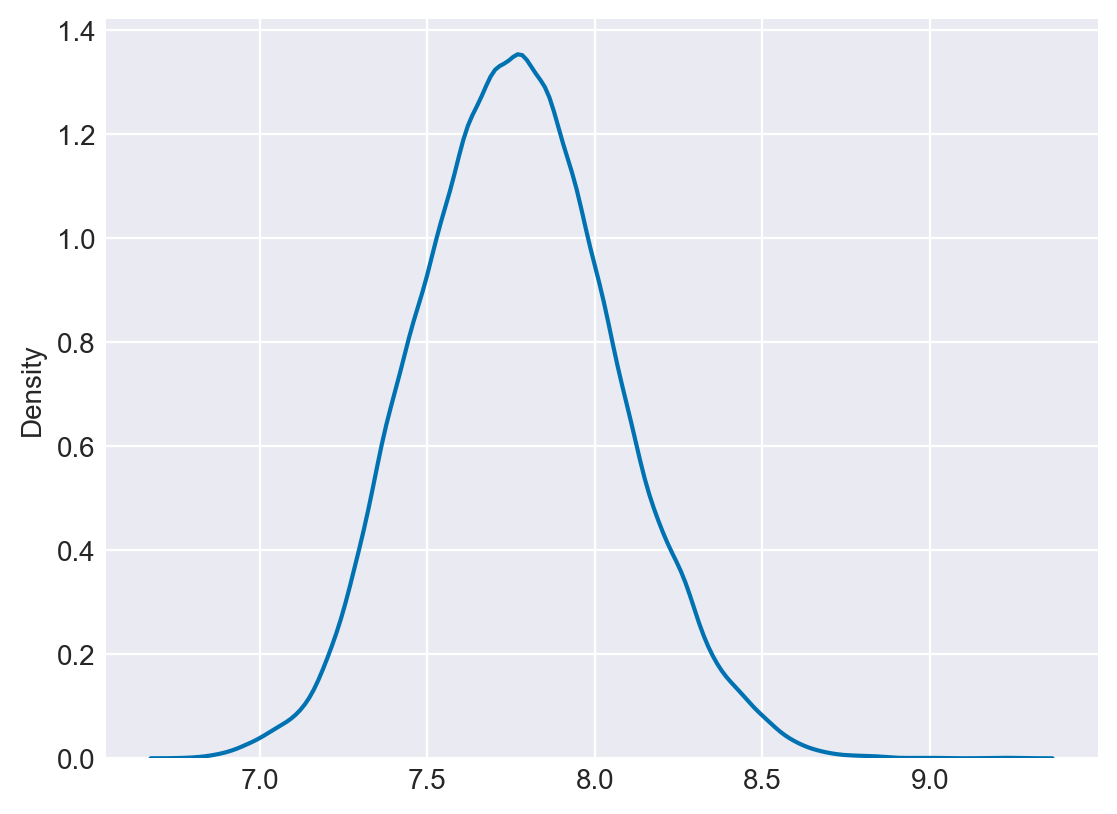

In [102]:
sns.kdeplot(sample_sigma_2);

#### Code 4.26

In [103]:
d2 = d[d.age >= 18] 

#### Code 4.27

In [104]:
with pm.Model() as m4_1:
    mu = pm.Normal('mu', mu=178, sigma=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height.values)


#### Code 4.28

In [123]:
with m4_1:
    trace_m4_1 = pm.sample(2000, tune=100, cores = 1, chains = 4)

# Im using 1 core because I'm getting a weird hanging error. This will run faster by either removing this core parameter or setting it to >1 (ideally 4).

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 100 tune and 2_000 draw iterations (400 + 8_000 draws total) took 5 seconds.


#### Code 4.29

In [112]:
pm.summary(trace_m4_1, hdi_prob=.89)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,154.611,0.434,153.921,155.280,0.039,0.027,128.0,115.0,1.07
sigma,7.753,0.275,7.303,8.164,0.014,0.010,380.0,283.0,1.00


#### Code 4.30

In [113]:
with pm.Model() as start:
    mu = pm.Normal('mu', mu=178, sigma=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height.values)
    trace_start = pm.sample(1000, 
                            tune=1000, 
                            cores = 1,
                            chains = 4,
                            init_values = {'mu': d2.height.mean(), 'sigma': d2.height.std()})

    

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


#### Code 4.31

In [114]:
with pm.Model() as m4_2:
    mu = pm.Normal('mu', mu=178, sigma=.1)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height.values)
    trace_m4_2 = pm.sample(1000, 
                            tune=1000, 
                            cores = 1,
                            chains = 4)
pm.summary(trace_m4_2, hdi_prob=.89)

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,177.864,0.100,177.708,178.029,0.002,0.001,4310.0,2723.0,1.0
sigma,24.624,0.925,23.141,26.042,0.015,0.011,3718.0,2721.0,1.0


#### Code 4.32

In [ ]:
trace_m4_1.posterior.to_dataframe().reset_index()[['mu', 'sigma']].cov()



,mu,sigma
mu,0.164156,0.000114
sigma,0.000114,0.086862


#### Code 4.33

In [129]:
display(np.diag(trace_m4_1.posterior.to_dataframe().reset_index()[['mu', 'sigma']].cov()))
display(trace_m4_1.posterior.to_dataframe().reset_index()[['mu', 'sigma']].corr())

array([0.16415563, 0.0868617 ])

,mu,sigma
mu,1.000000,0.000958
sigma,0.000958,1.000000


#### Code 4.34

In [ ]:
post = trace_m4_1.posterior.to_dataframe().reset_index()[['mu', 'sigma']]
post.head()

,mu,sigma
0,154.511480,7.608779
1,154.589488,7.793448
2,154.765616,7.957716
3,154.765616,7.957716
4,154.757935,7.893012


#### Code 4.35

In [135]:
az.summary(trace_m4_1, hdi_prob=.89)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,154.608,0.405,153.956,155.243,0.010,0.007,1640.0,1667.0,1.0
sigma,7.769,0.295,7.267,8.214,0.003,0.002,7801.0,6221.0,1.0


#### Code 4.36

In [ ]:
with pm.Model() as m4_1_logsigma:
    mu = pm.Normal('mu', mu=178, sigma=20)
    sigma = pm.Lognormal('sigma', mu=2, tau=0.01)
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=d2.height)
    trace_4_1_logsigma = pm.sample(1000, tune=1000)

#### Code 4.37

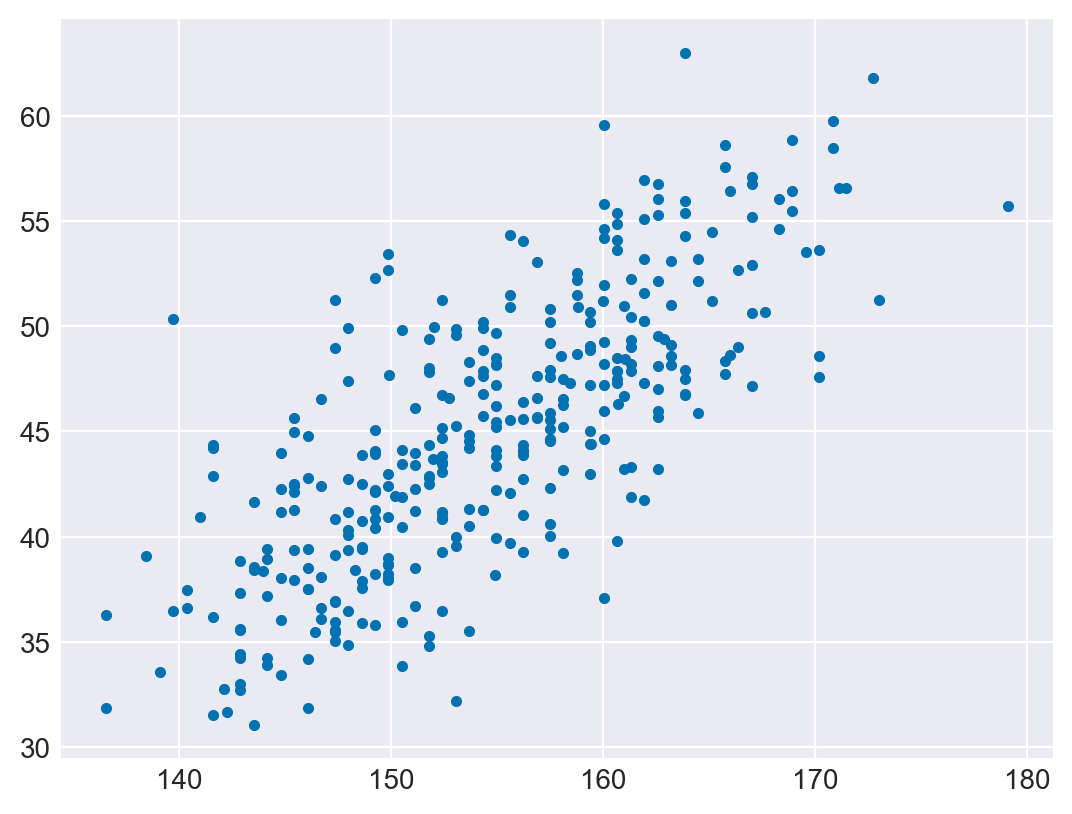

In [137]:
plt.plot(d2.height, d2.weight, '.');

#### Code 4.38

In [ ]:
np.random.seed(2971)
N = 100
a = np.random.normal(178, 20, size=N)
b = np.random.normal(0, 10, size=N)


#### Code 4.39

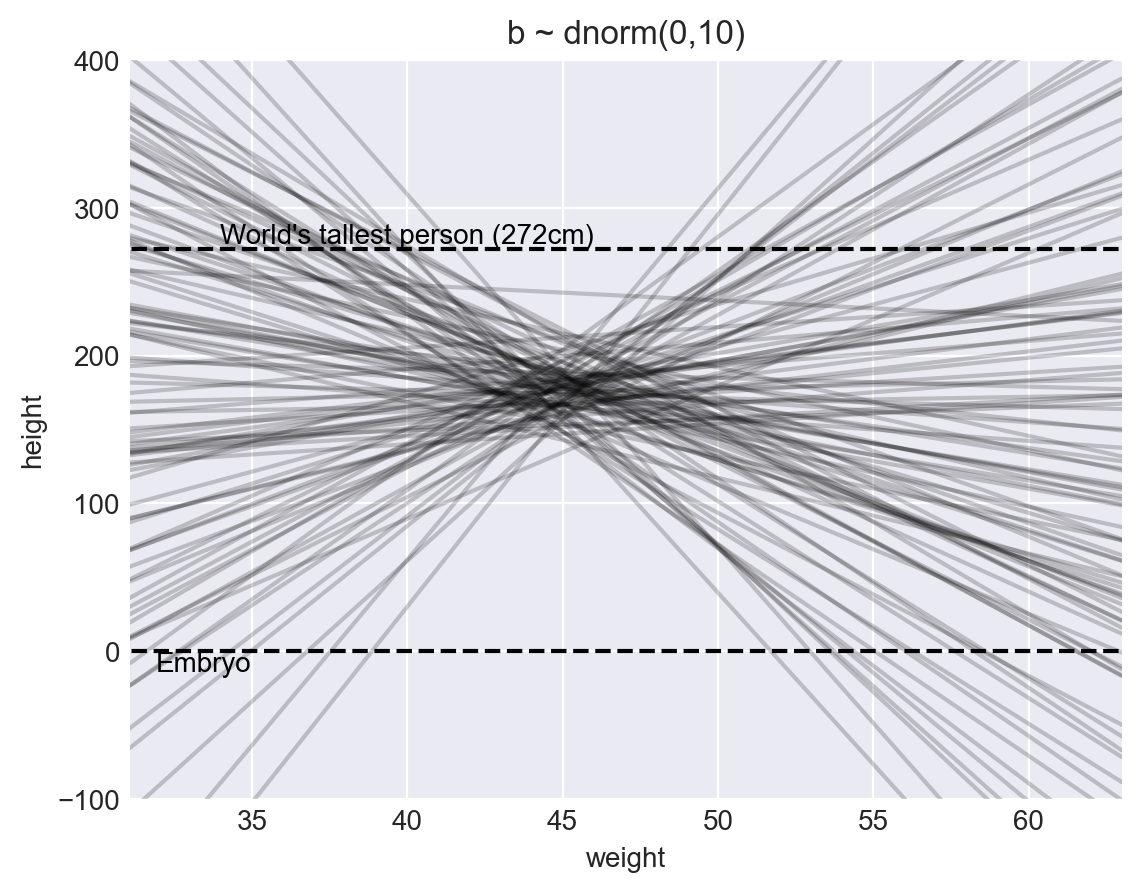

In [ ]:
x_range = np.linspace(d2.weight.min(), d2.weight.max(), N)
x_bar = d2.weight.mean()
for i in range(N):
    y = a[i] + b[i] * (x_range - x_bar)
    plt.plot(x_range, y, color='black', alpha=0.2)

plt.title("b ~ dnorm(0,10)")
plt.xlabel("weight")
plt.ylabel("height")
plt.vlines
plt.hlines(272, 0, 100, linestyles='dashed', color = 'black', label = 'World\'s tallest person (272cm)')
plt.text(46, 272, "World's tallest person (272cm)", color='black', 
         ha='right', va='bottom', fontsize=10)
plt.hlines(0, 0, 100, linestyles='dashed', color = 'black', label = 'Embryo')
plt.text(35, 0, 'Embryo', color='black', 
         ha='right', va='top', fontsize=10)
plt.xlim(d2.weight.min(), d2.weight.max())
plt.ylim(-100, 400)
plt.show()

#### Code 4.40

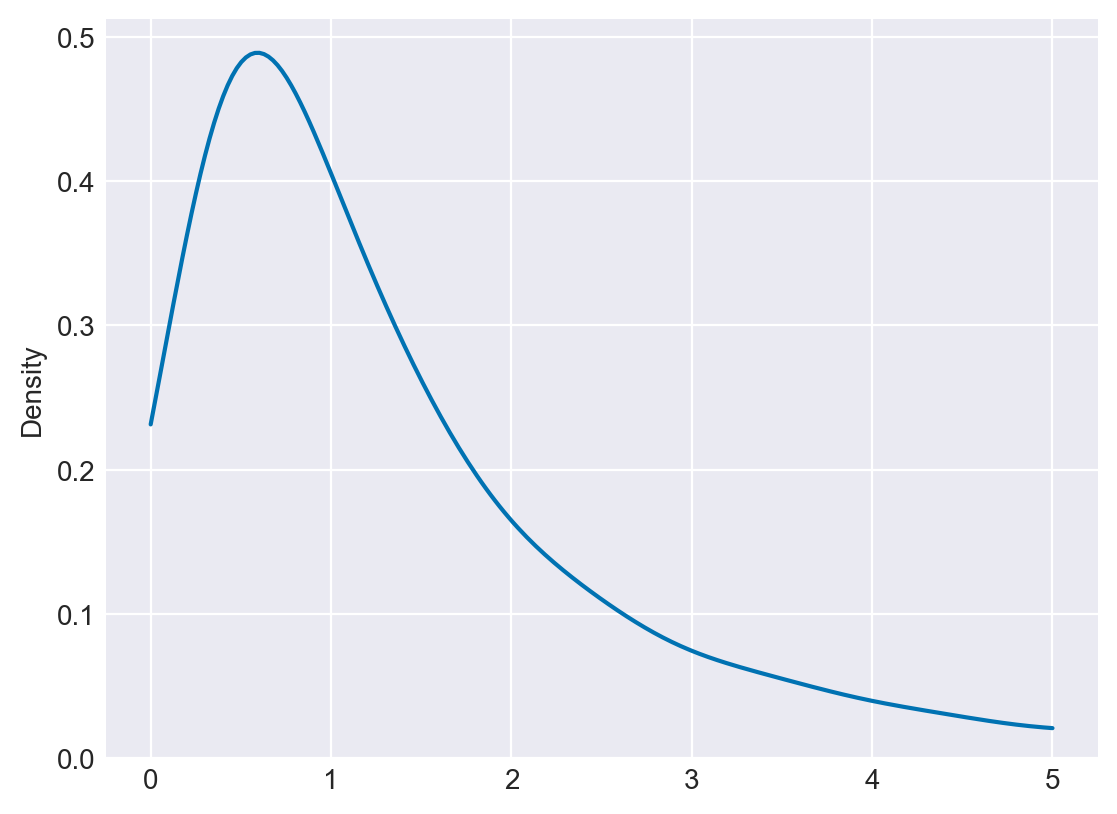

In [185]:
b = np.random.lognormal(0, 1, size=int(1e4)) 
sns.kdeplot(b, clip=(0, 5));

#### Code 4.41

In [186]:
np.random.seed(2971)
N = 100
a = np.random.normal(178, 20, size=N)
b = np.random.lognormal(0, 1, size=N)

#### Code 4.42

In [230]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d2 = d[d.age >= 18]

x_bar = d2.weight.mean() 

with pm.Model() as m4_3: 
    sigma = pm.Uniform('sigma', 0, 50)
    b  = pm.Lognormal('b', 0, 1)
    a = pm.Normal('a', 178, 20)
    mu = pm.Deterministic('mu', a + b * (d2.weight - x_bar)) 
    height = pm.Normal(
        'height',
        mu = mu,
        sigma = sigma,
        observed = d2.height.values
    )
    trace_m4_3 = pm.sample(1000, tune=1000, cores = 1, chains = 4)

    display(az.summary(trace_m4_3.posterior[['a', 'b']], hdi_prob=.89))


Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [sigma, b, a]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,154.595,0.280,154.163,155.050,0.004,0.003,6003.0,3133.0,1.0
b,0.902,0.042,0.833,0.965,0.001,0.000,5124.0,2777.0,1.0


#### Code 4.43

In [232]:
trace_m4_3.posterior.to_dataframe().reset_index().head(20)

,chain,draw,mu_dim_0,a,sigma,b,mu
0,0,0,0,154.55039,5.15736,0.953406,157.253412
1,0,0,1,154.55039,5.15736,0.953406,146.441976
2,0,0,2,154.55039,5.15736,0.953406,142.036316
3,0,0,3,154.55039,5.15736,0.953406,162.226672
4,0,0,4,154.55039,5.15736,0.953406,151.009808
5,0,0,5,154.55039,5.15736,0.953406,171.713707
6,0,0,6,154.55039,5.15736,0.953406,148.117749
7,0,0,7,154.55039,5.15736,0.953406,164.551131
8,0,0,8,154.55039,5.15736,0.953406,144.901347
9,0,0,9,154.55039,5.15736,0.953406,163.605130


In [199]:
with pm.Model() as m4_3b: 
    sigma = pm.Uniform('sigma', lower = 0, upper = 50)
    log_b  = pm.Normal('log_b', 0,1)
    a = pm.Normal('a', 178, 20)
    mu = pm.Deterministic('mu', a + np.exp(log_b) * (d2.weight.values - x_bar)) 
    height = pm.Normal(
        'height',
        mu = mu,
        sigma = sigma,
        observed = d2.height.values
    )
    trace_m4_3b= pm.sample(1000, tune=1000, cores = 1, chains = 4)

    display(az.summary(trace_m4_3b.posterior[['a', 'log_b']], hdi_prob=.89))



Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [sigma, log_b, a]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,154.609,0.277,154.167,155.059,0.003,0.002,7242.0,3032.0,1.0
log_b,-0.103,0.047,-0.182,-0.032,0.001,0.000,6356.0,3000.0,1.0


#### Code 4.4

In [201]:
pm.summary(trace_m4_3.posterior[['a', 'b','sigma']], hdi_prob=.89)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,154.603,0.267,154.176,155.018,0.003,0.002,6197.0,3053.0,1.0
b,0.903,0.041,0.841,0.972,0.001,0.000,6222.0,2934.0,1.0
sigma,5.104,0.191,4.784,5.394,0.002,0.002,5996.0,2851.0,1.0


#### Code 4.45

In [203]:
round(trace_m4_3.posterior.to_dataframe().reset_index()[['a', 'b', 'sigma']].cov(),3)

,a,b,sigma
a,0.071,0.000,-0.000
b,0.000,0.002,-0.000
sigma,-0.000,-0.000,0.036


#### Code 4.46

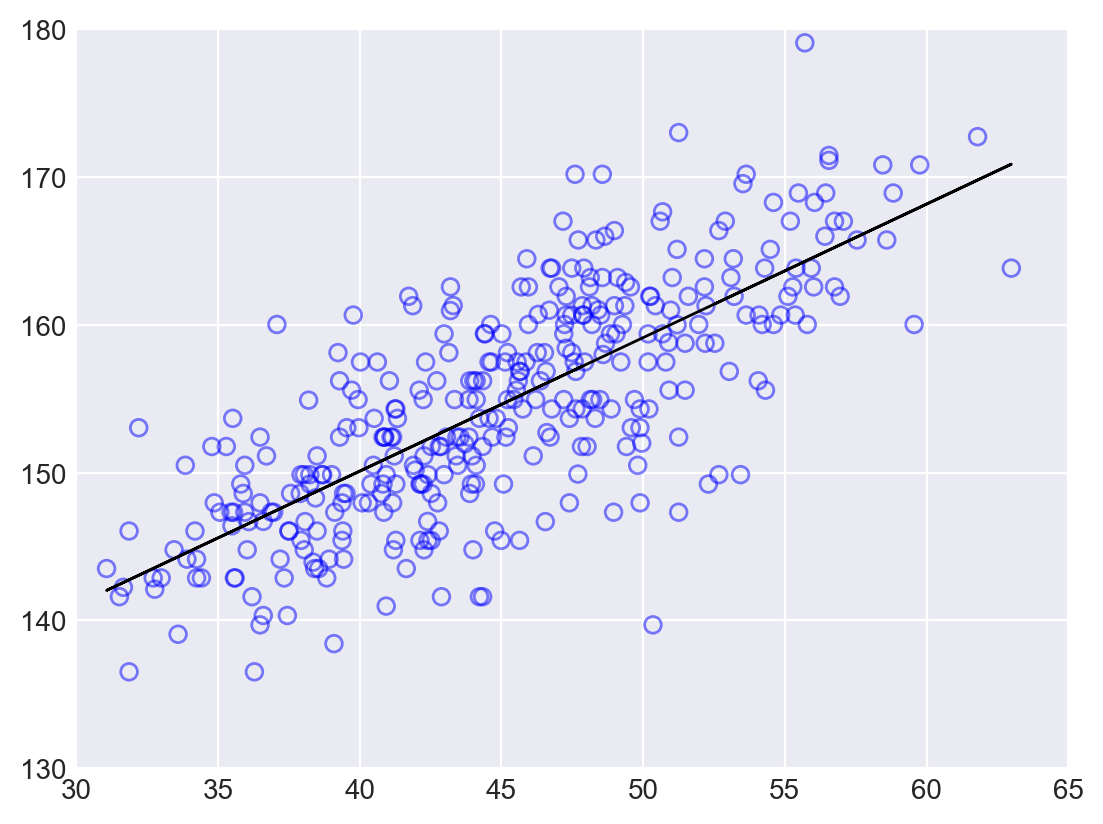

In [223]:
plt.scatter(d2.weight, d2.height, marker='o', edgecolor='blue', alpha=0.5, facecolor='none')
plt.xlim(30,65)
plt.ylim(130, 180)
post = trace_m4_3.posterior.to_dataframe().reset_index()
a_map = post['a'].mean() 
b_map = post['b'].mean()  
plt.plot(d2.weight,a_map + b_map * (d2.weight - x_bar), color='black', lw=1);

#### Code 4.47

In [243]:
post = trace_m4_3.posterior.to_dataframe().reset_index()[['a','b','sigma']].drop_duplicates().reset_index(drop=True)
post.head()


,a,b,sigma
0,154.550390,0.953406,5.157360
1,154.664434,0.856617,5.006079
2,154.748766,0.971640,4.984813
3,154.907278,0.969652,5.049137
4,154.279105,0.842821,5.126035


#### Code 4.48

In [ ]:
N = 10
dN = d2.iloc[:N, :]
with pm.Model() as mN:
    sigma = pm.Uniform('sigma', 0, 50)
    b  = pm.Lognormal('b', 0, 1)
    a = pm.Normal('a', 178, 20)
    mu = pm.Deterministic('mu', a + b * (dN.weight - dN.weight.mean()))
    height = pm.Normal('height', mu=mu, sigma=sigma, observed=dN.height.values)
    trace_N = pm.sample(1000, tune=1000, cores = 1, chains = 4)

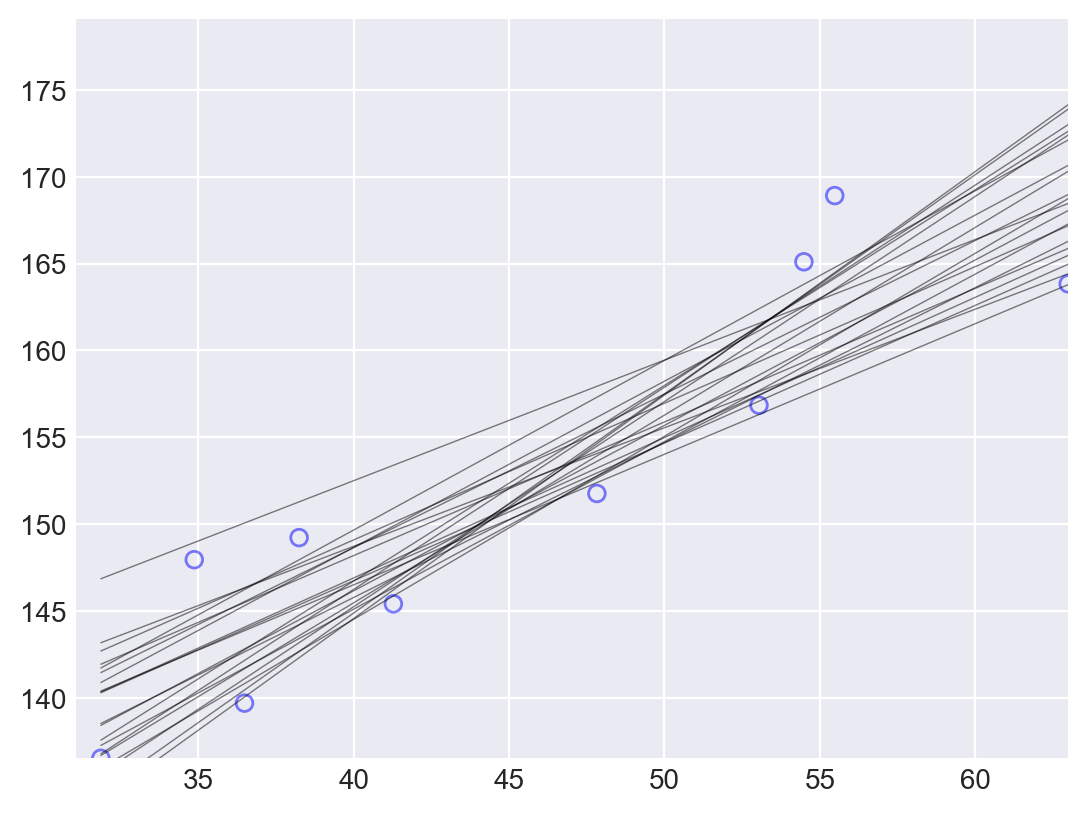

In [269]:
plt.scatter(dN.weight, dN.height, marker='o', edgecolor='blue', alpha=0.5, facecolor='none')
plt.xlim(d2.weight.min(), d2.weight.max())
plt.ylim(d2.height.min(), d2.height.max())
post = trace_N.posterior.to_dataframe().reset_index()[['a','b','sigma']].drop_duplicates().reset_index(drop=True)
x_range = np.linspace(dN.weight.min(), dN.weight.max(), 100)
for i in range(20):
    plt.plot(x_range,post['a'][i] + post['b'][i] * (x_range - dN.weight.mean()), color='black', lw=.5, alpha=.5);


#### Code 4.50

In [278]:
post = trace_m4_3.posterior.to_dataframe().reset_index()[['a','b','sigma']].drop_duplicates().reset_index(drop=True)
mu_at_50 = post.a + post.b * (50 - x_bar)

#### Code 4.51

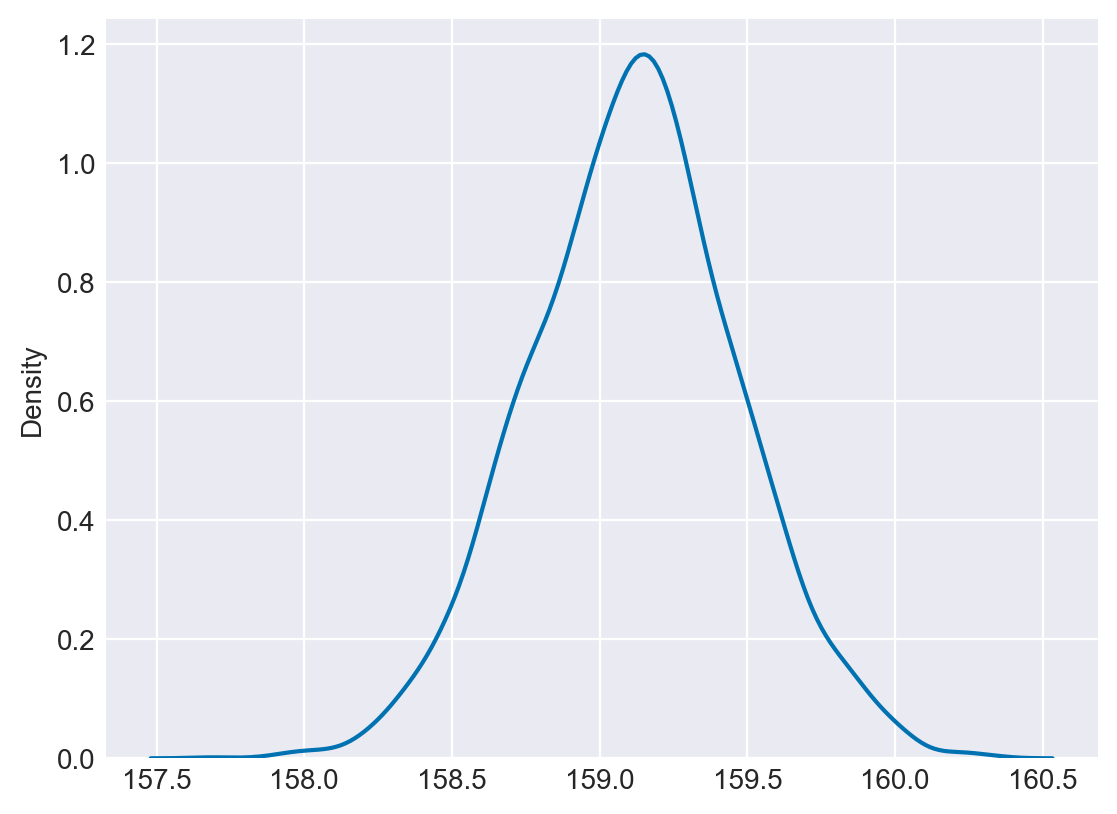

In [ ]:
sns.kdeplot(mu_at_50);

#### Code 4.52

In [283]:
pd.DataFrame(
    np.quantile(mu_at_50, [0.055, 0.945]).reshape(1, -1),
    columns=['5.5%', '94.5%']
)

,5.5%,94.5%
0,158.541982,159.679237


#### Code 4.53

In [ ]:
mu =  trace_m4_3.posterior['mu'][np.random.randint(0,4),:].values

#### Code 4.54

(135.0, 180.0)

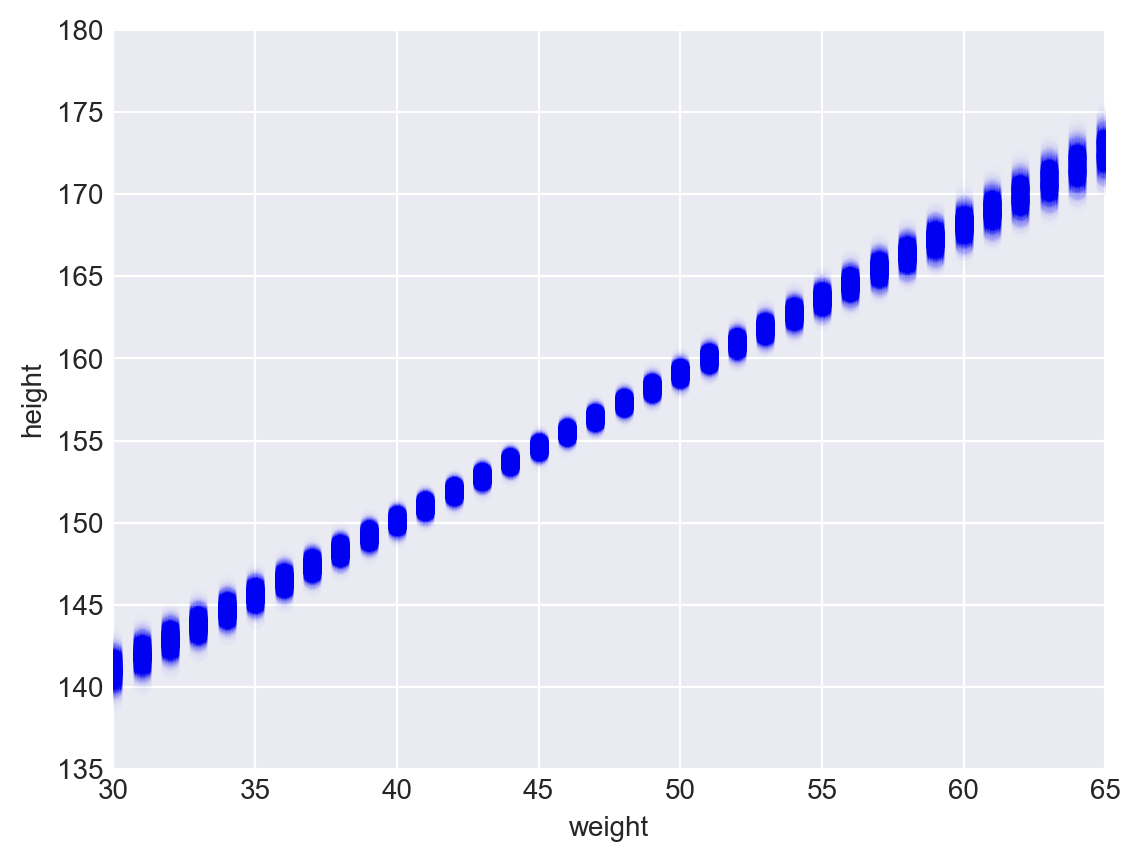

In [ ]:
weight_seq = np.arange(25, 71)

m4_4_traces = trace_m4_3.posterior[['a','b']].sel(chain = np.random.randint(0,4))
mu = np.zeros((len(weight_seq),m4_4_traces.sizes["draw"]))

for i, w in enumerate(weight_seq):
    mu[i] = m4_4_traces['a'] + m4_4_traces['b'] * (w - x_bar)


#We'll plot this again below but this is just to show how it looks
plt.plot(weight_seq, mu, 'o', color = 'blue', alpha = .002);
plt.xlabel('weight')
plt.ylabel('height')
plt.xlim(30,65)
plt.ylim(135,180)

#### Code 4.56

In [332]:
mu_mean = mu.mean(1)
mu_pi= az.hdi(mu.T, hdi_prob= .89)


/var/folders/5b/bs0n2tqj0c5_11dyn61ygmr00000gn/T/ipykernel_18358/2125997917.py:2: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  mu_pi= az.hdi(mu.T, hdi_prob= .89)


#### Code 4.57

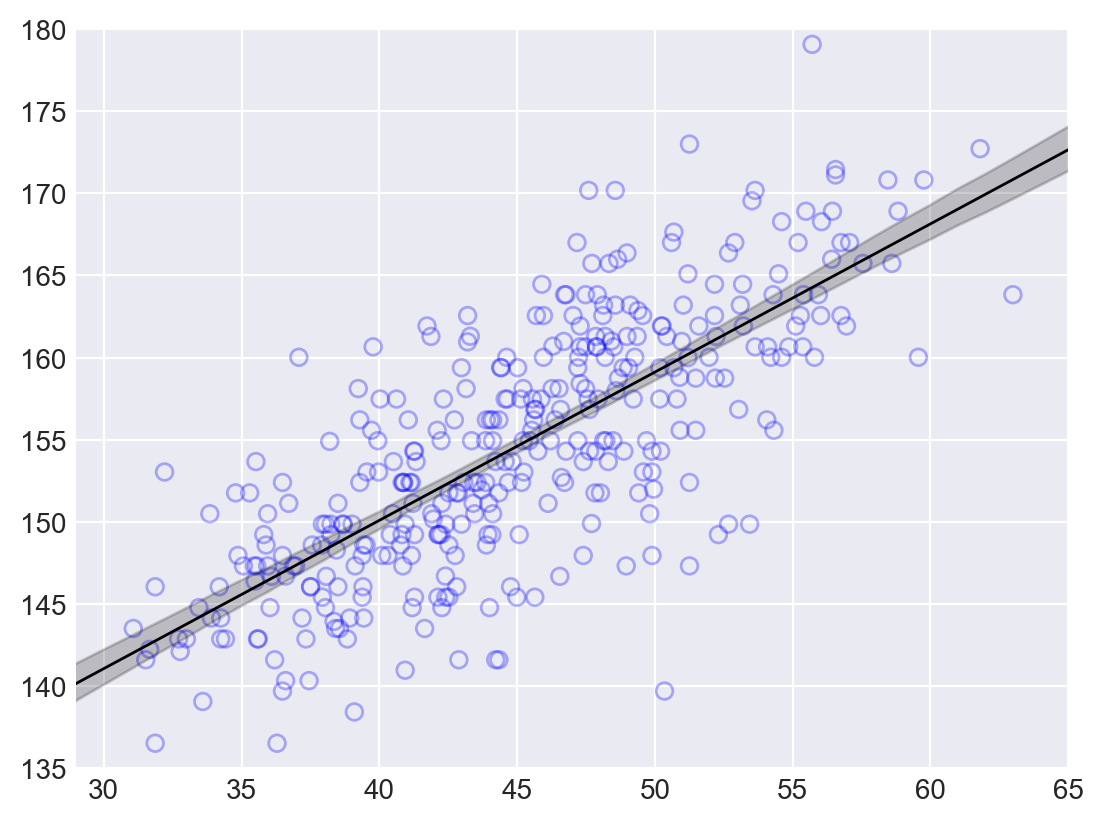

In [343]:
plt.scatter(d2.weight, d2.height, edgecolor = 'blue', facecolor = 'none', alpha = .3);
plt.plot(weight_seq, mu_mean, color = 'black', lw = 1);
plt.fill_between(weight_seq, mu_pi[:,0], mu_pi[:,1], color = 'black', alpha = .2)
plt.xlim(29,65)
plt.ylim(135,180);

#### Code 4.58

_This is just describing the link function that we don't even use so I'll skip it for now._

#### Code 4.59

In [ ]:
weight_seq = np.arange(25, 71)

m4_4_traces = trace_m4_3.posterior[['a','b','sigma']].sel(chain = np.random.randint(0,4))
mu = np.zeros((len(weight_seq),m4_4_traces.sizes["draw"]))

for i, w in enumerate(weight_seq):
    mu[i] = m4_4_traces['a'] + m4_4_traces['b'] * (w - x_bar)

sim_height = np.random.normal(mu, m4_4_traces['sigma'])

(46, 1000)


#### Code 4.60

In [371]:
height_pi = pd.DataFrame(
    np.quantile(sim_height, [0.055, 0.945]).reshape(1, -1),
    columns=['5.5%', '94.5%']
)
height_pi= az.hdi(sim_height.T, hdi_prob= .89)


/var/folders/5b/bs0n2tqj0c5_11dyn61ygmr00000gn/T/ipykernel_18358/3281751627.py:5: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  height_pi= az.hdi(sim_height.T, hdi_prob= .89)


#### Code 4.61

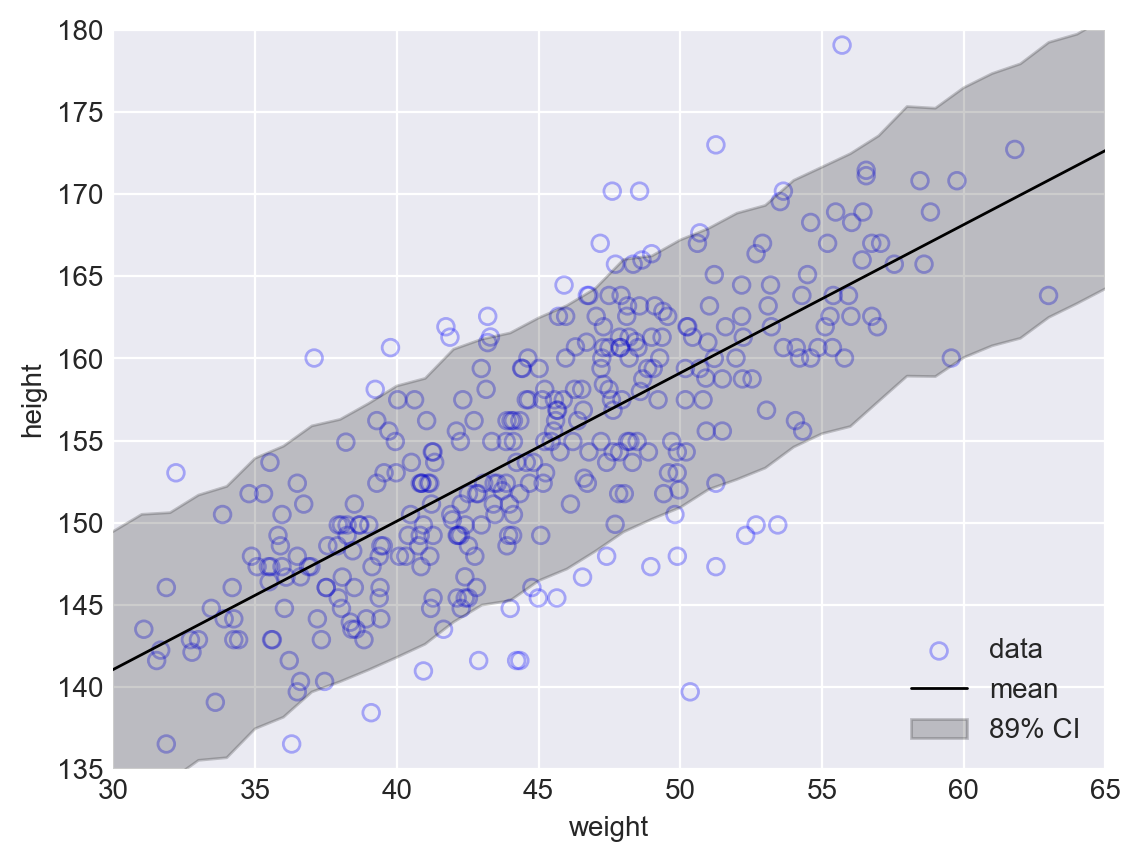

In [372]:
plt.scatter(d2.weight, d2.height, marker='o', edgecolor='blue', facecolors='none', alpha=.3, label='data')
plt.xlabel('weight')
plt.ylabel('height')
plt.plot(weight_seq, mu_mean, color='black', lw=1, label='mean')
plt.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], color='black', alpha=.2, label='89% CI')
plt.legend(loc='lower right')
plt.xlim(30,65)
plt.ylim(135,180);

#### Code 4.62

In [390]:
weight_seq = np.arange(25, 71)
sample_size = 4000

m4_4_traces = trace_m4_3.posterior[['a','b','sigma']].to_dataframe().reset_index().sample(sample_size)
mu = np.zeros((len(weight_seq),m4_4_traces.shape[0]))

for i, w in enumerate(weight_seq):
    mu[i] = m4_4_traces['a'] + m4_4_traces['b'] * (w - x_bar)

sim_height = np.random.normal(mu, m4_4_traces['sigma'])

height_pi= az.hdi(sim_height.T, hdi_prob= .89)


/var/folders/5b/bs0n2tqj0c5_11dyn61ygmr00000gn/T/ipykernel_18358/4175816275.py:12: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  height_pi= az.hdi(sim_height.T, hdi_prob= .89)


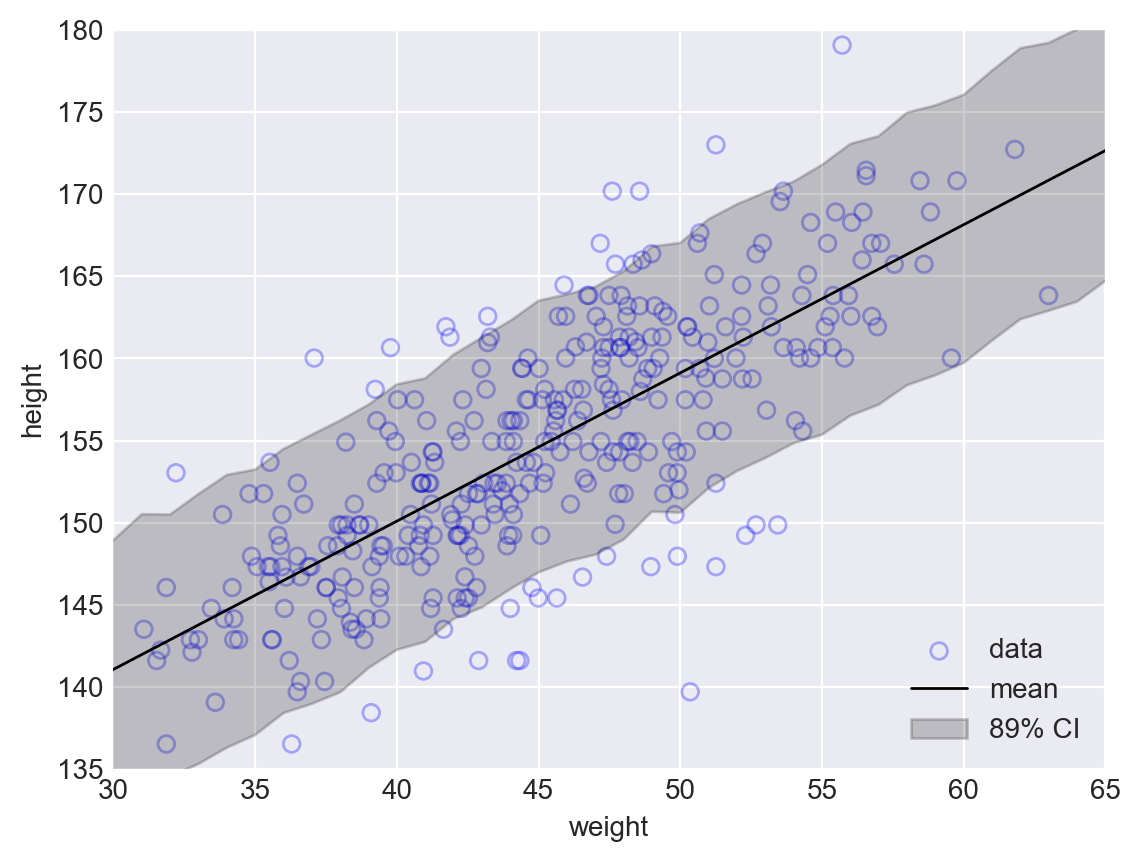

In [391]:
plt.scatter(d2.weight, d2.height, marker='o', edgecolor='blue', facecolors='none', alpha=.3, label='data')
plt.xlabel('weight')
plt.ylabel('height')
plt.plot(weight_seq, mu_mean, color='black', lw=1, label='mean')
plt.fill_between(weight_seq, height_pi[:,0], height_pi[:,1], color='black', alpha=.2, label='89% CI')
plt.legend(loc='lower right')
plt.xlim(30,65)
plt.ylim(135,180);

#### Code 4.63

_This is a description of the sim function in R.  We'll just be using the variables and process instead so we'll skip this code block for now._


#### Code 4.64

In [ ]:
d = pd.read_csv('Data/Howell1.csv', sep=';', header=0)
d.head()
#plt.plot(d.weight, d.height, '.');

#### Code 4.65

In [ ]:
d['weight_s'] = (d.weight - d.weight.mean()) / d.weight.std()
d['weight_s2'] = d.weight_s ** 2


with pm.Model() as m4_5: 
    sigma = pm.Uniform('sigma', 0, 50)
    b1  = pm.Lognormal('b1', 0, 1)
    b2 = pm.Normal('b2', 0, 1)
    a = pm.Normal('a', 178, 20)
    mu = pm.Deterministic('mu', a + (b1 * d['weight_s']) + (b2 * d['weight_s2'])) 
    height = pm.Normal(
        'height',
        mu = mu,
        sigma = sigma,
        observed = d.height.values
    )
    trace_m4_5 = pm.sample(1000, tune=1000, cores = 1, chains = 4)
    m4_5_posterior = pm.sample_posterior_predictive(trace_m4_5)



Initializing NUTS using jitter+adapt_diag...


    height     weight   age  male  weight_s  weight_s2
0  151.765  47.825606  63.0     1  0.829869   0.688682
1  139.700  36.485807  63.0     0  0.059459   0.003535
2  136.525  31.864838  65.0     0 -0.254483   0.064762
3  156.845  53.041914  41.0     1  1.184257   1.402466
4  145.415  41.276872  51.0     0  0.384957   0.148192


Sequential sampling (4 chains in 1 job)
NUTS: [sigma, b1, b2, a]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.
Sampling: [height]


Output()

#### Code 4.65

In [408]:
pm.summary(trace_m4_5.posterior[['a', 'b1', 'b2', 'sigma']], hdi_prob=.89)

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,146.060,0.371,145.445,146.633,0.007,0.005,2631.0,2866.0,1.0
b1,21.729,0.290,21.276,22.190,0.006,0.004,2679.0,2752.0,1.0
b2,-7.807,0.275,-8.265,-7.389,0.006,0.004,2348.0,2808.0,1.0
sigma,5.805,0.178,5.520,6.087,0.003,0.002,3367.0,2794.0,1.0


#### Code 4.66

In [ ]:
mu_pred = trace_m4_5.posterior['mu'].values
idx = np.argsort(d.weight_s)
mu_hpd = az.hdi(mu_pred, hdi_prob=.89)[idx]
mu_mean = mu_pred.mean(1)

height_pred = m4_5_posterior.posterior_predictive['height'].sel(chain = 1).values

height_hpd = az.hdi(height_pred, hdi_prob=.89)[idx]
height_mean = np.sort(height_pred.mean(0));

plt.scatter(d.weight_s, d.height, c='C0', alpha=0.3);
plt.plot(d.weight_s[idx], height_mean, color='black')
plt.fill_between(d.weight_s[idx], mu_hpd[:,0], mu_hpd[:,1], color='black', alpha = .1, );
plt.fill_between(d.weight_s[idx], height_hpd[:,0], height_hpd[:,1], color='black', alpha=0.25);

/var/folders/5b/bs0n2tqj0c5_11dyn61ygmr00000gn/T/ipykernel_18358/3953416004.py:8: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  height_hpd = az.hdi(height_pred, hdi_prob=.89)[idx]


#### Code 4.68

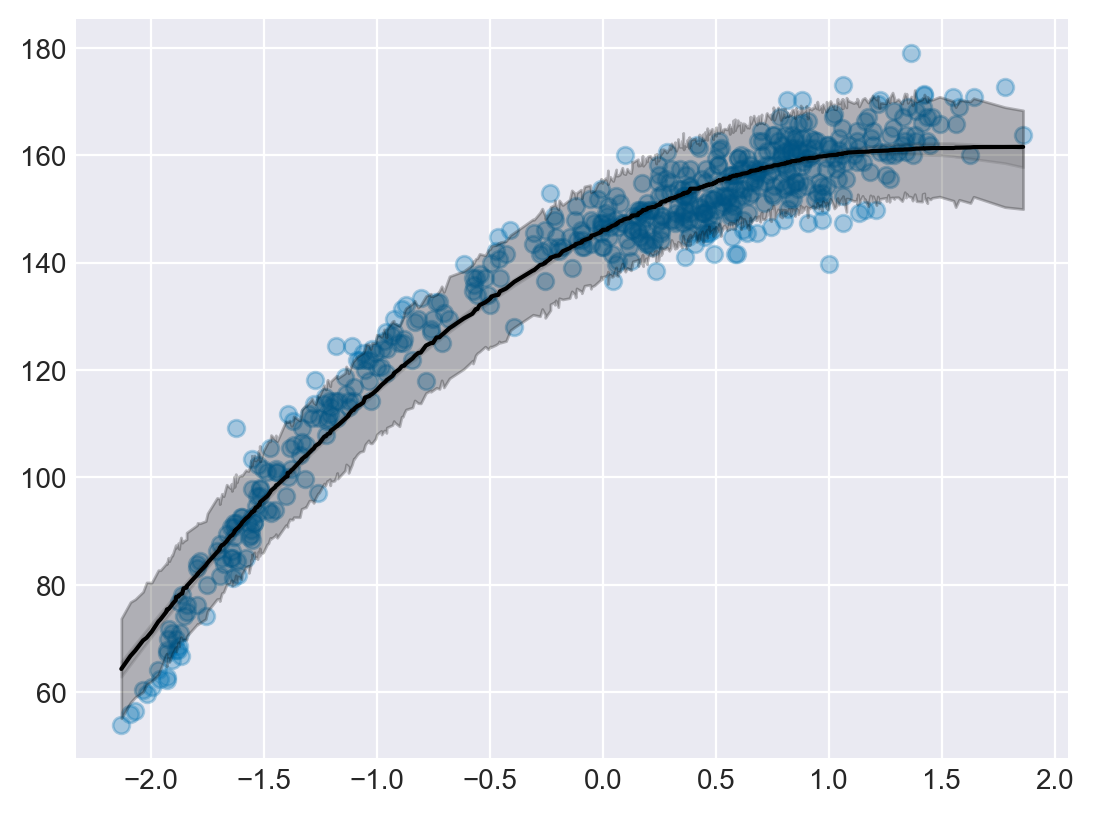

In [ ]:
plt.scatter(d.weight_s, d.height, c='C0', alpha=0.3);
plt.plot(d.weight_s[idx], height_mean, color='black')
plt.fill_between(d.weight_s[idx], mu_hpd[:,0], mu_hpd[:,1], color='black', alpha = .1, );
plt.fill_between(d.weight_s[idx], height_hpd[:,0], height_hpd[:,1], color='black', alpha=0.25);

#### Code 4.69

In [425]:
d['weight_s3'] = d.weight_s ** 3
with pm.Model() as m4_6:
    sigma = pm.Uniform('sigma', 0, 50)
    b1  = pm.Lognormal('b1', 0, 1)
    b2 = pm.Normal('b2', 0, 1)
    b3 = pm.Normal('b3', 0, 1)
    a = pm.Normal('a', 178, 20)
    mu = pm.Deterministic('mu', a + (b1 * d['weight_s']) + (b2 * d['weight_s2']) + (b3 * d['weight_s3']))
    height = pm.Normal(
        'height',
        mu = mu,
        sigma = sigma,
        observed = d.height.values
    )
    trace_m4_6 = pm.sample(1000, tune=1000, cores = 1, chains = 4)
    m4_6_posterior = pm.sample_posterior_predictive(trace_m4_6)


Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [sigma, b1, b2, b3, a]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
Sampling: [height]


Output()

#### Code 4.7

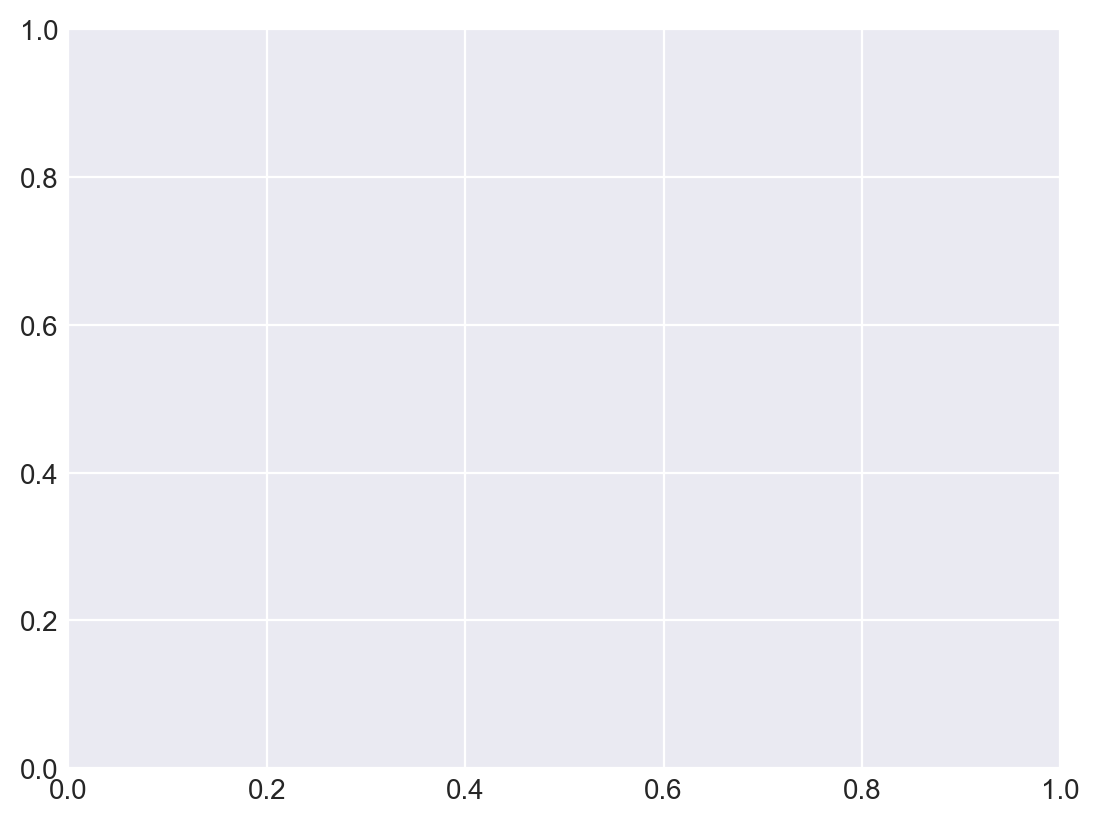

In [440]:
ax = plt.gca() 
xticks = ax.get_xticks() 

#### Code 4.71

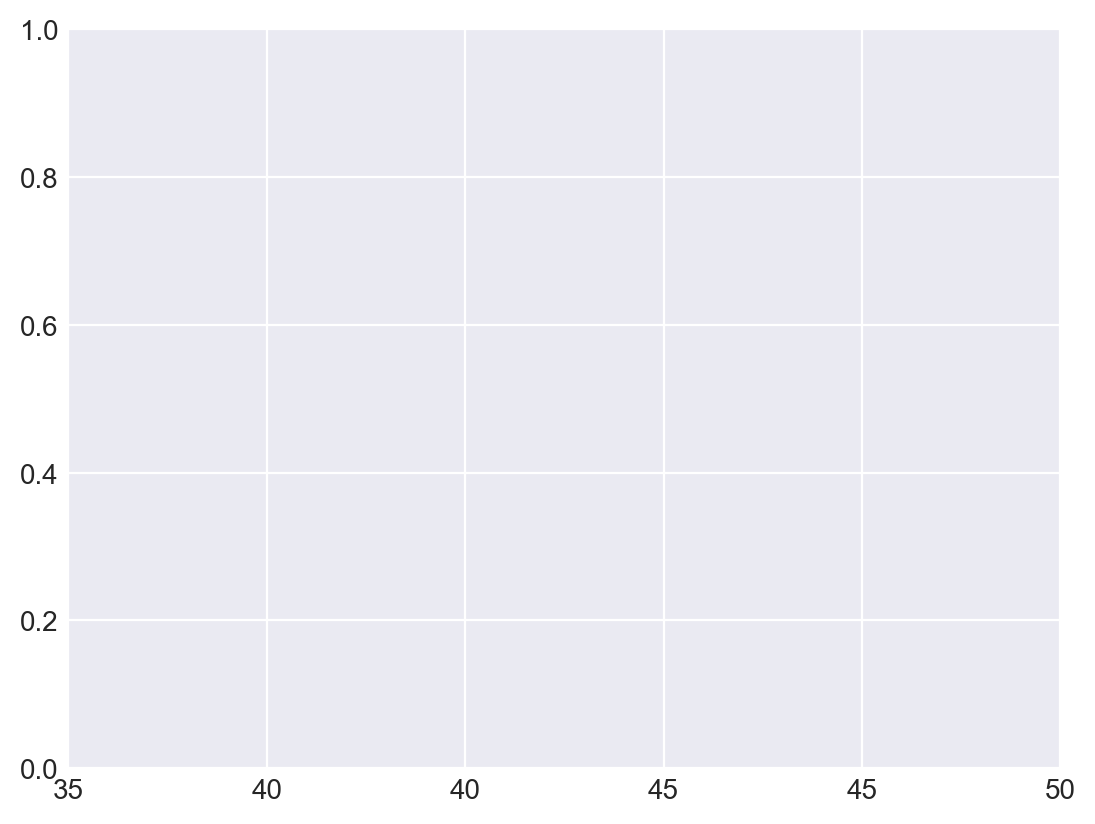

In [441]:
x_ticks_natural = xticks * d.weight.std() + d.weight.mean() 
x_ticks_rounded = np.round(np.array(x_ticks_natural) / 5) * 5
plt.xticks(xticks, [f'{x:.0f}' for x in x_ticks_rounded]);

#### Code 4.72

In [ ]:
d = pd.read_csv('data/cherryblossoms.csv', sep=';')
d.describe()

,year,doy,temp,temp_upper,temp_lower
count,1215.000000,827.000000,1124.000000,1124.000000,1124.000000
mean,1408.000000,104.540508,6.141886,7.185151,5.098941
std,350.884596,6.407036,0.663648,0.992921,0.850350
min,801.000000,86.000000,4.670000,5.450000,0.750000
25%,1104.500000,100.000000,5.700000,6.480000,4.610000
50%,1408.000000,105.000000,6.100000,7.040000,5.145000
75%,1711.500000,109.000000,6.530000,7.720000,5.542500
max,2015.000000,124.000000,8.300000,12.100000,7.740000


#### Code 4.73

In [ ]:
d2 = d.dropna(subset=['temp']) 
num_knots = 15 
knot_list = pd.qcut(d2.year, q=num_knots)

38      (838.999, 931.867]
39      (838.999, 931.867]
40      (838.999, 931.867]
41      (838.999, 931.867]
42      (838.999, 931.867]
               ...        
1175    (1905.133, 1980.0]
1176    (1905.133, 1980.0]
1177    (1905.133, 1980.0]
1178    (1905.133, 1980.0]
1179    (1905.133, 1980.0]
Name: year, Length: 1124, dtype: category
Categories (15, interval[float64, right]): [(838.999, 931.867] < (931.867, 1006.733] < (1006.733, 1081.6] < (1081.6, 1156.467] ... (1680.533, 1755.4] < (1755.4, 1830.267] < (1830.267, 1905.133] < (1905.133, 1980.0]]


#### Code 4.74

In [ ]:
from patsy import dmatrix
knots = knot_list[1:-1]
knots_numeric = [knot.right for knot in knots] 

degree = 3  
intercept = True  
formula = f"bs(year, knots={knots_numeric}, degree={degree}, include_intercept={intercept})"

B = dmatrix(formula, data=d2, return_type='dataframe')


(1124, 1127)

#### Code 4.75

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlim(d2.year.min(), d2.year.max())
plt.ylim(0, 1)
plt.xlabel('year')
plt.ylabel('basis value')

for col in B.columns:
    plt.plot(d2.year, B[col], color='black', alpha=.7)

#### Code 4.76

In [468]:
with pm.Model() as m4_7: 
    sigma = pm.Exponential('sigma', 1)
    w = pm.Normal('w', mu=0, sigma=1, shape=B.shape[1])
    a = pm.Normal('a', mu=6, sigma=10)
    mu = pm.Deterministic('mu', a + pm.math.dot(np.array(B), w))
    T = pm.Normal('T', mu=mu, sigma=sigma, observed=d2.temp.values)
    trace_m4_7 = pm.sample(100, tune=100, cores = 1, chains = 4)
    m4_7_post = pm.sample_posterior_predictive(trace_m4_7)


Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [sigma, w, a]


Output()

Sampling 4 chains for 100 tune and 100 draw iterations (400 + 400 draws total) took 272 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Sampling: [T]


Output()

#### Code 4.77

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

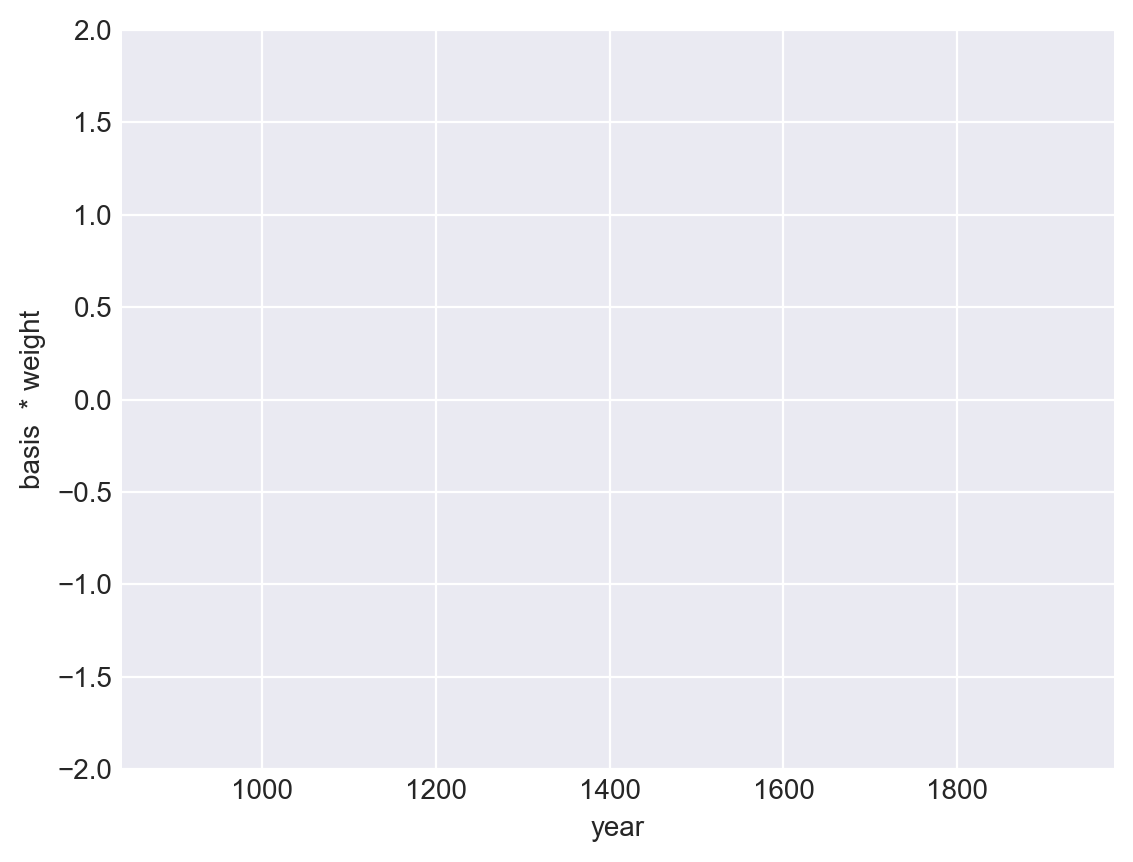

In [ ]:
post = trace_m4_7.posterior.to_dataframe().reset_index()[['a','w','sigma']].drop_duplicates().reset_index(drop=True)
w = post['w'].values
plt.plot([],[])
plt.xlim(d2.year.min(), d2.year.max())
plt.ylim(-2, 2)
plt.xlabel('year')
plt.ylabel('basis  * weight')


In [471]:

for i in range(B.shape[1]):
    plt.plot(d2.year, w[:,i] * B.iloc[:,i], color='black', alpha=.7)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

#### Code 4.78

In [ ]:
mu_pred = trace_m4_7.posterior['mu'].values
idx = np.argsort(d2.year)
mu_hpd = az.hdi(mu_pred, hdi_prob=.89)[idx]
mu_mean = mu_pred.mean(1)

T_pred = m4_7_post.posterior_predictive['T'].sel(chain = 1).values

T_hpd = az.hdi(T_pred, hdi_prob=.89)[idx]
T_mean = np.sort(T_pred.mean(0));

plt.scatter(d2.year, d2.temp, c='C0', alpha=0.3);
plt.plot(d2.year[idx], T_mean, color='black')
plt.fill_between(d2.year[idx], mu_hpd[:,0], mu_hpd[:,1], color='black', alpha = .1, );
plt.fill_between(d2.year[idx], T_hpd[:,0], T_hpd[:,1], color='black', alpha=0.25);

#### Code 4.79

_This is largely a R situation.  THere's not much need to be so explicit in the application of the matrix multiplication._